In [18]:
import cv2
import numpy as np
import mediapipe as mp
import time
import matplotlib.pyplot as plt


In [19]:
mp_holistic = mp.solutions.holistic   # Holistic model (face, pose, hands)
mp_drawing = mp.solutions.drawing_utils  # Drawing utilities


In [20]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR → RGB
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # RGB → BGR
    return image, results

def draw_styled_landmarks(image, results):
    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )

    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )

    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )


In [21]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Draw styled landmarks
        draw_styled_landmarks(image, results)

        # Show the frame
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [27]:
#hello
import os
import numpy as np
import cv2
import time

# Create folders if they don’t exist
DATA_PATH = os.path.join('MP_Data')
ACTION = 'Hello'
num_sequences = 1       # number of video sequences to record
sequence_length = 30    # number of frames per sequence

os.makedirs(os.path.join(DATA_PATH, ACTION), exist_ok=True)
os.makedirs(os.path.join(DATA_PATH, ACTION, '0'), exist_ok=True)

cap = cv2.VideoCapture(0)

def extract_keypoints(results):
    """Extract pose, face, left hand, right hand landmarks into a single array"""
    pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh   = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh   = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

with mp_holistic.Holistic(min_detection_confidence=0.5, 
                          min_tracking_confidence=0.5) as holistic:
    
    for sequence in range(num_sequences):
        for frame_num in range(sequence_length):
            ret, frame = cap.read()
            if not ret:
                break

            # Detect keypoints
            image, results = mediapipe_detection(frame, holistic)
            draw_styled_landmarks(image, results)

            # Show frame count
            cv2.putText(image, f'Sign: {ACTION}', (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 
                        1, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.putText(image, f'Frame: {frame_num+1}/{sequence_length}', (10, 80),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0), 2, cv2.LINE_AA)

            cv2.imshow('Collecting Data', image)

            # Extract keypoints and save
            keypoints = extract_keypoints(results)
            npy_path = os.path.join(DATA_PATH, ACTION, str(sequence), f"{frame_num}.npy")
            np.save(npy_path, keypoints)

            # Delay for natural capture speed
            time.sleep(0.3)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()
print(f"✅ Data collection for '{ACTION}' completed and saved in MP_Data/{ACTION}/")


✅ Data collection for 'Hello' completed and saved in MP_Data/Hello/


In [ ]:
#thank you
import os
import numpy as np
import cv2
import time

# Create folders if they don’t exist
DATA_PATH = os.path.join('MP_Data')
ACTION = 'ThankYou'
num_sequences = 1       # number of sequences to record
sequence_length = 30    # number of frames per sequence

os.makedirs(os.path.join(DATA_PATH, ACTION), exist_ok=True)
os.makedirs(os.path.join(DATA_PATH, ACTION, '0'), exist_ok=True)

cap = cv2.VideoCapture(0)

def extract_keypoints(results):
    """Extract pose, face, left hand, right hand landmarks into a single array"""
    pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh   = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh   = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

with mp_holistic.Holistic(min_detection_confidence=0.5, 
                          min_tracking_confidence=0.5) as holistic:
    
    for sequence in range(num_sequences):
        for frame_num in range(sequence_length):
            ret, frame = cap.read()
            if not ret:
                break

            # Detect keypoints
            image, results = mediapipe_detection(frame, holistic)
            draw_styled_landmarks(image, results)

            # Show label and progress
            cv2.putText(image, f'Sign: {ACTION}', (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 
                        1, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.putText(image, f'Frame: {frame_num+1}/{sequence_length}', (10, 80),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0), 2, cv2.LINE_AA)

            cv2.imshow('Collecting Data', image)

            # Save keypoints
            keypoints = extract_keypoints(results)
            npy_path = os.path.join(DATA_PATH, ACTION, str(sequence), f"{frame_num}.npy")
            np.save(npy_path, keypoints)

            # Adjust capture speed
            time.sleep(0.5)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()
print(f"✅ Data collection for '{ACTION}' completed and saved in MP_Data/{ACTION}/")


✅ Data collection for 'ThankYou' completed and saved in MP_Data/ThankYou/


In [ ]:
#i love you
import os
import numpy as np
import cv2
import time

# Create folders if not exist
DATA_PATH = os.path.join('MP_Data')
ACTION = 'ILoveYou'
num_sequences = 1        # Number of recordings
sequence_length = 30     # Frames per recording

os.makedirs(os.path.join(DATA_PATH, ACTION), exist_ok=True)
os.makedirs(os.path.join(DATA_PATH, ACTION, '0'), exist_ok=True)

cap = cv2.VideoCapture(0)

def extract_keypoints(results):
    """Extract pose, face, left hand, right hand landmarks into a single array"""
    pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh   = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh   = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

with mp_holistic.Holistic(min_detection_confidence=0.5, 
                          min_tracking_confidence=0.5) as holistic:
    
    for sequence in range(num_sequences):
        for frame_num in range(sequence_length):
            ret, frame = cap.read()
            if not ret:
                break

            # Detect keypoints
            image, results = mediapipe_detection(frame, holistic)
            draw_styled_landmarks(image, results)

            # Show label and frame progress
            cv2.putText(image, f'Sign: {ACTION}', (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 
                        1, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.putText(image, f'Frame: {frame_num+1}/{sequence_length}', (10, 80),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0), 2, cv2.LINE_AA)

            cv2.imshow('Collecting Data', image)

            # Save keypoints
            keypoints = extract_keypoints(results)
            npy_path = os.path.join(DATA_PATH, ACTION, str(sequence), f"{frame_num}.npy")
            np.save(npy_path, keypoints)

            # Add delay to control capture speed
            time.sleep(0.5)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()
print(f"✅ Data collection for '{ACTION}' completed and saved in MP_Data/{ACTION}/")


✅ Data collection for 'ILoveYou' completed and saved in MP_Data/ILoveYou/


In [ ]:
#yes
import os
import numpy as np
import cv2
import time

# Create folders if not exist
DATA_PATH = os.path.join('MP_Data')
ACTION = 'Yes'
num_sequences = 1        # Number of recordings
sequence_length = 30     # Frames per recording

os.makedirs(os.path.join(DATA_PATH, ACTION), exist_ok=True)
os.makedirs(os.path.join(DATA_PATH, ACTION, '0'), exist_ok=True)

cap = cv2.VideoCapture(0)

def extract_keypoints(results):
    """Extract pose, face, left hand, right hand landmarks into a single array"""
    pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh   = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh   = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

with mp_holistic.Holistic(min_detection_confidence=0.5, 
                          min_tracking_confidence=0.5) as holistic:
    
    for sequence in range(num_sequences):
        for frame_num in range(sequence_length):
            ret, frame = cap.read()
            if not ret:
                break

            # Detect keypoints
            image, results = mediapipe_detection(frame, holistic)
            draw_styled_landmarks(image, results)

            # Show label and frame progress
            cv2.putText(image, f'Sign: {ACTION}', (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 
                        1, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.putText(image, f'Frame: {frame_num+1}/{sequence_length}', (10, 80),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0), 2, cv2.LINE_AA)

            cv2.imshow('Collecting Data', image)

            # Save keypoints
            keypoints = extract_keypoints(results)
            npy_path = os.path.join(DATA_PATH, ACTION, str(sequence), f"{frame_num}.npy")
            np.save(npy_path, keypoints)

            # Add delay to control capture speed
            time.sleep(0.5)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()
print(f"✅ Data collection for '{ACTION}' completed and saved in MP_Data/{ACTION}/")


✅ Data collection for 'Yes' completed and saved in MP_Data/Yes/


In [36]:
#no
import os
import numpy as np
import cv2
import time

# Create folders if not exist
DATA_PATH = os.path.join('MP_Data')
ACTION = 'No'
num_sequences = 1        # Number of recordings
sequence_length = 30     # Frames per recording

os.makedirs(os.path.join(DATA_PATH, ACTION), exist_ok=True)
os.makedirs(os.path.join(DATA_PATH, ACTION, '0'), exist_ok=True)

cap = cv2.VideoCapture(0)

def extract_keypoints(results):
    """Extract pose, face, left hand, right hand landmarks into a single array"""
    pose = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh   = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh   = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

with mp_holistic.Holistic(min_detection_confidence=0.5, 
                          min_tracking_confidence=0.5) as holistic:
    
    for sequence in range(num_sequences):
        for frame_num in range(sequence_length):
            ret, frame = cap.read()
            if not ret:
                break

            # Detect keypoints
            image, results = mediapipe_detection(frame, holistic)
            draw_styled_landmarks(image, results)

            # Show label and progress
            cv2.putText(image, f'Sign: {ACTION}', (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 
                        1, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.putText(image, f'Frame: {frame_num+1}/{sequence_length}', (10, 80),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0), 2, cv2.LINE_AA)

            cv2.imshow('Collecting Data', image)

            # Save keypoints
            keypoints = extract_keypoints(results)
            npy_path = os.path.join(DATA_PATH, ACTION, str(sequence), f"{frame_num}.npy")
            np.save(npy_path, keypoints)

            # Add slight delay to control speed
            time.sleep(0.5)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()
print(f"✅ Data collection for '{ACTION}' completed and saved in MP_Data/{ACTION}/")


✅ Data collection for 'No' completed and saved in MP_Data/No/


In [47]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [48]:
# Define data path and actions
DATA_PATH = os.path.join('MP_Data')  # Folder where data is stored
actions = np.array(['hello', 'thankyou', 'iloveyou', 'yes', 'no'])

sequence_length = 30  # Frames per sequence


In [49]:
# Prepare lists
sequences, labels = [], []

for idx, action in enumerate(actions):
    action_dir = os.path.join(DATA_PATH, action)
    for sequence in os.listdir(action_dir):
        window = []
        for frame_num in range(sequence_length):
            try:
                res = np.load(os.path.join(action_dir, sequence, f"{frame_num}.npy"))
                window.append(res)
            except:
                pass
        if len(window) == sequence_length:
            sequences.append(window)
            labels.append(idx)

X = np.array(sequences)
y = np.array(labels)

print("✅ Data loaded successfully!")
print("X shape:", X.shape)
print("y shape:", y.shape)


✅ Data loaded successfully!
X shape: (5, 30, 1629)
y shape: (5,)


In [50]:
# Convert labels to categorical
y = to_categorical(y, num_classes=len(actions))

# Ensure correct shape
if len(y.shape) > 2:
    y = np.argmax(y, axis=-1)
    y = to_categorical(y, num_classes=len(actions))

print("✅ Fixed y shape:", y.shape)


✅ Fixed y shape: (5, 5)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (4, 30, 1629) (4, 5)
Test shape: (1, 30, 1629) (1, 5)


In [52]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

model = Sequential([
    Input(shape=(30, X.shape[2])),
    LSTM(128, return_sequences=True, activation='relu'),
    Dropout(0.3),
    LSTM(64, return_sequences=False, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(actions.shape[0], activation='softmax')
])

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 30, 128)        │       900,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 953,989 (3.64 MB)

 Trainable params: 953,989 (3.64 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
es = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=8,
    validation_data=(X_test, y_test),
    callbacks=[es]
)


Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 1.5893 - val_accuracy: 0.0000e+00 - val_loss: 42.8411
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.0000e+00 - loss: 14.3934 - val_accuracy: 0.0000e+00 - val_loss: 22.7885
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.2500 - loss: 16.0535 - val_accuracy: 0.0000e+00 - val_loss: 31.0675
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.5000 - loss: 6.9338 - val_accuracy: 0.0000e+00 - val_loss: 20.4123
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.2500 - loss: 29.1062 - val_accuracy: 0.0000e+00 - val_loss: 9.6575
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.0000e+00 - loss: 10.4321 - val_accuracy: 0.0000e+00 - val_loss: 13.6466
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.0000e+00 - loss: 14.0391 - val_accuracy: 0.0000e+00 - val_loss: 35.6874
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.2500 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0560
✅ Accuracy: 100.00%


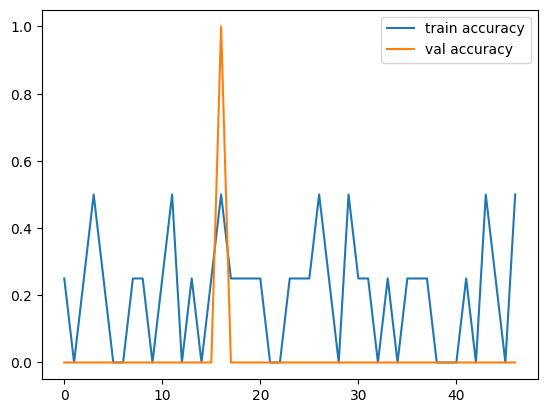

In [54]:
res = model.evaluate(X_test, y_test)
print(f"✅ Accuracy: {res[1] * 100:.2f}%")

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()


In [55]:
model.save('action_model.h5')
print("✅ Model saved as 'action_model.h5'")


✅ Model saved as 'action_model.h5'


In [56]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("Test Accuracy:", accuracy_score(y_true_classes, y_pred_classes))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Test Accuracy: 1.0
